In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import sklearn.metrics as sm
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
#read csv file
dataset = pd.read_csv("House_Price_Dataset.csv")
print(len(dataset))

#prints datatypes of each feature 
print(dataset.dtypes) 


34857
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
Seller            object
Date              object
Distance         float64
Postcode         float64
Rooms2           float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longitude        float64
RegionName        object
PropertyCount    float64
dtype: object


In [3]:
#Number of null values in each feature
dataset.isnull().sum().sort_values(ascending = False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Rooms2            8217
Longitude         7976
Latitude          7976
Price             7610
RegionName           3
PropertyCount        3
CouncilArea          3
Postcode             1
Distance             1
Date                 0
Seller               0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

In [4]:
#information of the dataset
dataset.describe()

,Rooms,Price,Distance,Postcode,Rooms2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,PropertyCount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
#Dataset cleaning

#removes rows with null values for price 
dataset = pd.DataFrame(dataset)
dataset.dropna(subset = ["Price"],inplace = True) 


#replace null values with most frequent values present in each column
mode_category = ['YearBuilt','Car','Bathroom','Longitude','Latitude','Rooms2','RegionName','PropertyCount','CouncilArea','Postcode','Date','Seller','Method','Type','Rooms','Address','Suburb']
dataset[mode_category] = dataset[mode_category].fillna(dataset[mode_category].mode().iloc[0])

#replace null values with the mean value of each column
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean())
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['Landsize'].mean())
dataset['Distance'] = dataset['Distance'].fillna(dataset['Distance'].mean())

print(len(dataset))

27247


In [6]:
dataset.isnull().sum().sort_values(ascending = False)

PropertyCount    0
Postcode         0
Address          0
Rooms            0
Type             0
Price            0
Method           0
Seller           0
Date             0
Distance         0
Rooms2           0
RegionName       0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longitude        0
Suburb           0
dtype: int64

In [7]:
#Convert categorical data into numerical data 
dataset["Suburb"] = dataset["Suburb"].astype('category').cat.codes
dataset["Type"] = dataset["Type"].astype('category').cat.codes
dataset["Method"] = dataset["Method"].astype('category').cat.codes
dataset["Seller"] = dataset["Seller"].astype('category').cat.codes
dataset["CouncilArea"] = dataset["CouncilArea"].astype('category').cat.codes
dataset["RegionName"] = dataset["RegionName"].astype('category').cat.codes
dataset["Address"] = dataset["Address"].astype('category').cat.codes
dataset["Date"] = dataset["Date"].astype('category').cat.codes


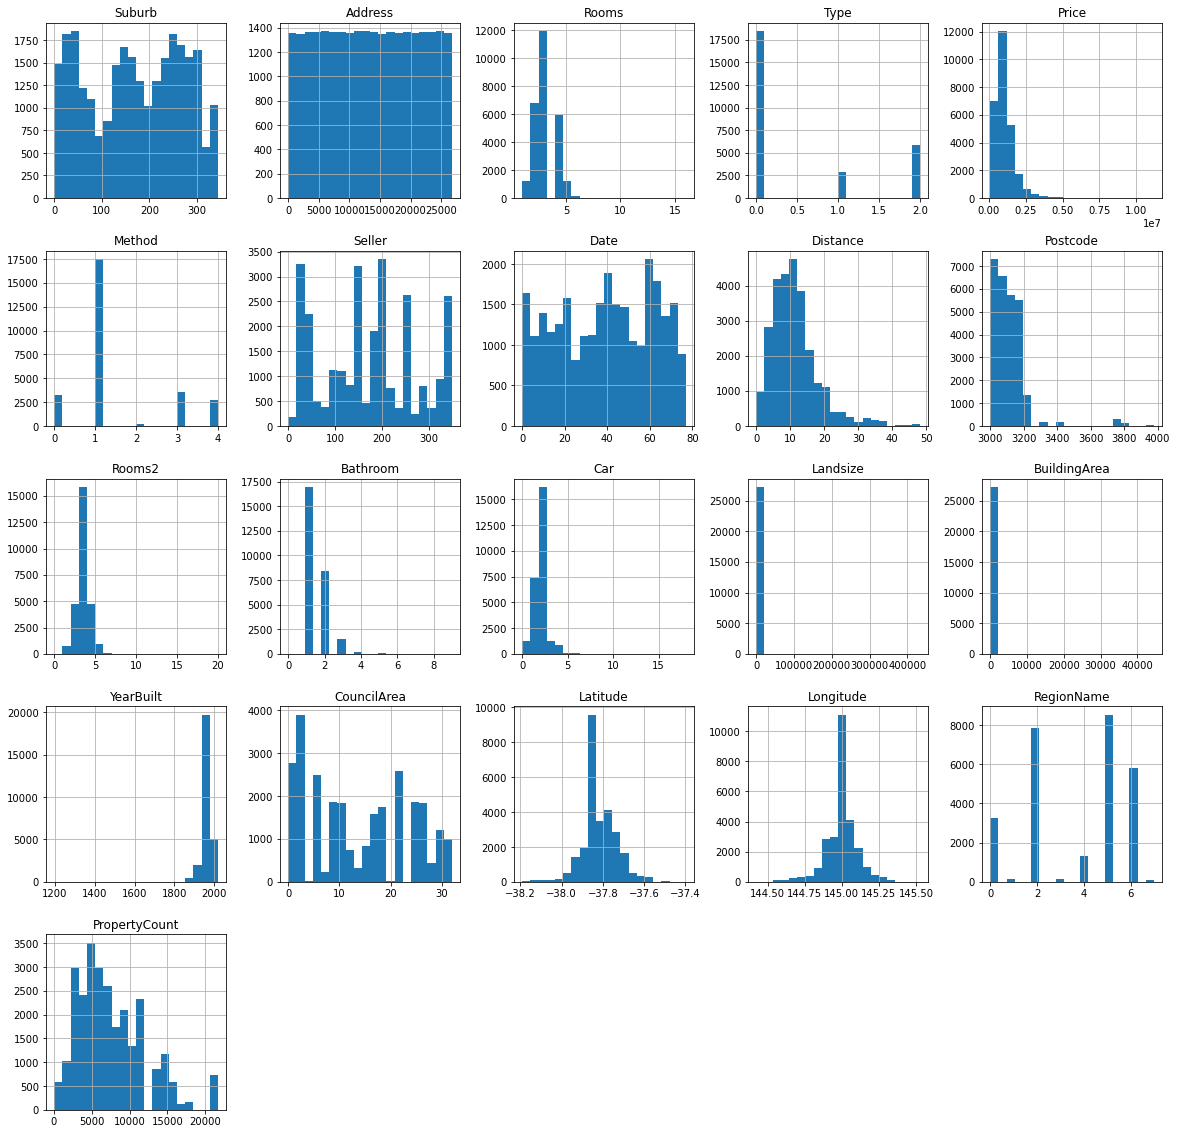

In [8]:
#Histograms
dataset.hist(figsize=(20,20), bins=20)
plt.show()

In [9]:
#Remove irrelavent data
irrelavent = ['Landsize','BuildingArea']
dataset.drop(irrelavent,axis=1,inplace=True)

print(len(dataset))

27247


In [10]:
#Split dataset into train test sets (trainset - 70% / testset - 30% )
 
data_train,data_test = train_test_split(dataset, test_size = 0.3,random_state=40,shuffle= True)
print("Train Set : ",len(data_train)) 
print("Test Set : ",len(data_test))
 

Train Set :  19072
Test Set :  8175


/Users/shenurisumanasekara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

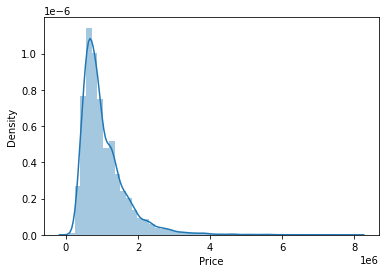

In [11]:
#Information on price
data_train['Price'].describe()
sns.distplot(data_train['Price'])

/Users/shenurisumanasekara/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/shenurisumanasekara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

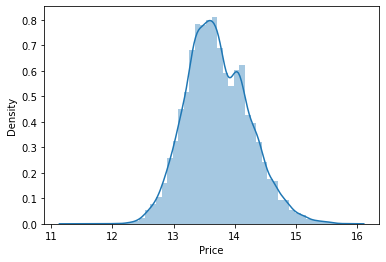

In [12]:
#Normalized price plot
data_train.Price = np.log(data_train.Price)
sns.distplot(data_train['Price'])


In [13]:
#Correlations of each feature with price
correlation_matrix = data_train.corr()
correlation_matrix['Price'].sort_values(ascending = False)

Price            1.000000
Rooms            0.529402
Rooms2           0.421883
Bathroom         0.389120
Longitude        0.224135
Car              0.172932
Address          0.046407
RegionName       0.037279
Postcode         0.035422
Date             0.027218
Method          -0.037003
Seller          -0.066982
PropertyCount   -0.086056
CouncilArea     -0.117560
Suburb          -0.144307
Latitude        -0.193204
Distance        -0.207077
YearBuilt       -0.256488
Type            -0.473726
Name: Price, dtype: float64

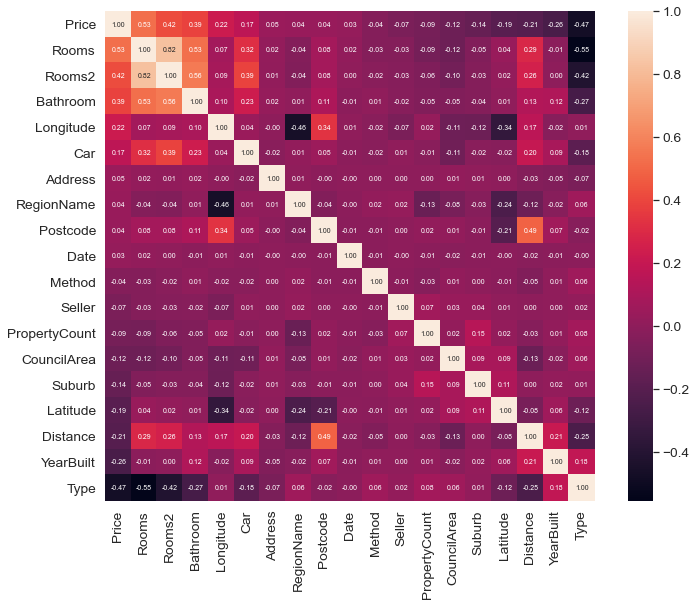

In [14]:
#Heat map
correlation_num = 19
correlation_cols = correlation_matrix.nlargest(correlation_num,'Price')['Price'].index
correlation_mat_sales = np.corrcoef(data_train[correlation_cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(correlation_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=correlation_cols.values, xticklabels=correlation_cols.values)
plt.show()

In [15]:
#Assign train target set -> price 
y_train = data_train['Price']
data_train.drop('Price',axis=1,inplace=True)


/Users/shenurisumanasekara/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
#Mulitple liear regression model
#Train model

linear_model = LinearRegression()
linear_model.fit(data_train,y_train)


LinearRegression()

In [17]:
#Assign train target set -> price
y_test = data_test['Price']
data_test.drop('Price',axis=1,inplace=True)

/Users/shenurisumanasekara/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
#make predictions using linear regression
price_predict =np.exp(linear_model.predict(data_test))

#Measure Performance 
linear_mse = mean_squared_error(y_test,price_predict)
print("Mean Squared error: ",linear_mse)
linear_SqMse = np.sqrt(linear_mse)
print(linear_SqMse)

print("Explain variance score for Linear Regression =", round(sm.explained_variance_score(y_test,price_predict),2)) 
print("R2 score for Linear Regression =", round(sm.r2_score(y_test, price_predict), 2))



Mean Squared error:  262381241641.16898
512231.62889572623
Explain variance score for Linear Regression = 0.42
R2 score for Linear Regression = 0.41


In [19]:
#Random forest model

# Create a model with 50 decision trees
forest_model= RandomForestRegressor(n_estimators = 50, random_state = 42)

# Train the model with training data
forest_model.fit(data_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [20]:
#make predictions using random forest model
price_predict =np.exp(forest_model.predict(data_test))


forest_mse = mean_squared_error(y_test,price_predict)
print("Mean Squared Error : " , forest_mse)
forest_SqMse = np.sqrt(forest_mse)
print(forest_SqMse)

#Measure Performance 
print("Explain variance score for Random Forest Regression =", round(sm.explained_variance_score(y_test,price_predict), 2)) 
print("R2 score for Random Forest Regression =", round(sm.r2_score(y_test, price_predict), 2))



Mean Squared Error :  124601427853.34038
352989.2744168587
Explain variance score for Random Forest Regression = 0.72
R2 score for Random Forest Regression = 0.72
